## Karhunen-Loève (KL) Expansion

The **Karhunen-Loève (KL) Expansion** is a powerful mathematical tool used to represent a zero-mean stochastic process $ n(t) $ in terms of orthogonal basis functions derived from its own autocorrelation structure.

### Eigenfunction Decomposition

The process begins by solving an eigenvalue problem involving the autocorrelation function $ R(t,\tau) $. The solutions yield a set of orthonormal eigenfunctions $ \{\Theta_i(t)\} $ and corresponding eigenvalues $ \{\lambda_i\} $.
   
Consider a zero-mean stochastic process $ n(t) $ with autocorrelation function $ R(t,\tau) $. Let $ \{\Theta_i(t)\}_{i=1}^\infty $ be a complete set of orthonormal functions that satisfy the eigenvalue problem:

$$
\boxed{
\int R(t,\tau) \Theta_i(\tau) \, d\tau = \lambda_i \Theta_i(t), \quad i = 1, 2, \dots
}
$$

### Series Representation: KL Expansion of $ n(t) $

The stochastic process $ n(t) $ is expressed as an infinite series of these eigenfunctions, each scaled by a random coefficient $ n_i $. 

This series effectively decomposes the process into uncorrelated components.

$$
n(t) = \sum_{i=1}^\infty n_i \Theta_i(t)
$$

where the coefficients $ n_i $ are given by:

$$
n_i = \int n(t) \Theta_i^*(t) \, dt, \quad i = 1, 2, \dots
$$

### Properties of the Coefficients: Uncorrelated Coefficients

The coefficients $ n_i $ have zero mean and are uncorrelated, as indicated by $ \mathbb{E}[n_i n_j^*] = \lambda_i \delta_{ij} $. This property simplifies the analysis and processing of the stochastic process, as each component can be treated independently.

The coefficients $ \{n_i\} $ are uncorrelated random variables with:

$$
\begin{align*}
\mathbb{E}[n_i] &= 0 \\
\mathbb{E}[n_i n_j^*] &= \lambda_i \delta_{ij}
\end{align*}
$$

The Karhunen-Loève Expansion offers a structured and efficient way to analyze and represent stochastic processes by leveraging their inherent correlation properties through orthogonal function decomposition.

The KL expansion is optimal in the sense that it provides the best possible mean-square approximation of the stochastic process with a finite number of terms. This makes it highly useful in applications like signal processing, data compression, and statistical analysis.

### Mercer's Theorem

Mercer's Theorem underpins the KL expansion by ensuring that the autocorrelation function $ R(t,\tau) $ can be expressed as a convergent series of the eigenfunctions and eigenvalues. 

The autocorrelation function can be expanded as:

$$
\boxed{
R(t,\tau) = \sum_{j=1}^\infty \lambda_j \Theta_j(t) \Theta_j^*(\tau)
}
$$

This guarantees that the KL expansion faithfully represents the statistical properties of the original process.

### Example: KL Expansion of a White Noise Process

In this example, the **Karhunen-Loève expansion** is applied to a zero-mean white noise process $ X(t) $ with a power spectral density of $ \frac{N_0}{2} $, defined over an arbitrary interval $[a, b]$.

### KL Exapansion Derivation Steps:

1. **Eigenvalue Equation**: To derive the KL expansion, we first need to solve the following integral equation involving the autocorrelation function:

   $$
   \int_a^b \frac{N_0}{2} \delta(t_1 - t_2) \phi_n(t_2) dt_2 = \lambda_n \phi_n(t_1), \quad a < t_1 < b
   $$
   
   Here, $ \delta(t_1 - t_2) $ is the Dirac delta function, representing the autocorrelation of the white noise process.

2. **Simplification using the Sifting Property**: The sifting property of the Dirac delta function allows us to simplify the integral equation as follows:

   $$
   \frac{N_0}{2} \phi_n(t_1) = \lambda_n \phi_n(t_1), \quad a < t_1 < b
   $$

   This equation suggests that the eigenfunctions $ \phi_n(t) $ can be any arbitrary orthonormal functions because the eigenvalue $ \lambda_n = \frac{N_0}{2} $ is constant for all $ n $.

The result indicates that **any orthonormal basis** can be used for the expansion of a white noise process, and all the coefficients $ X_n $ in the KL expansion will have the same variance of $ \frac{N_0}{2} $.

Thus, for white noise processes, the KL expansion allows flexibility in choosing the orthonormal functions $ \phi_n(t) $. 

The coefficients resulting from the expansion will always have the same variance, given by the power spectral density $ \frac{N_0}{2} $.

### Simulation

Demonstrate the Karhunen-Loève expansion for a white noise process
- Generate a white noise process.
- Construct an orthonormal basis
- Expand the white noise process onto the orthonormal basis.
- Compute the coordinates of the white noise signal in the orthonormal basis space.

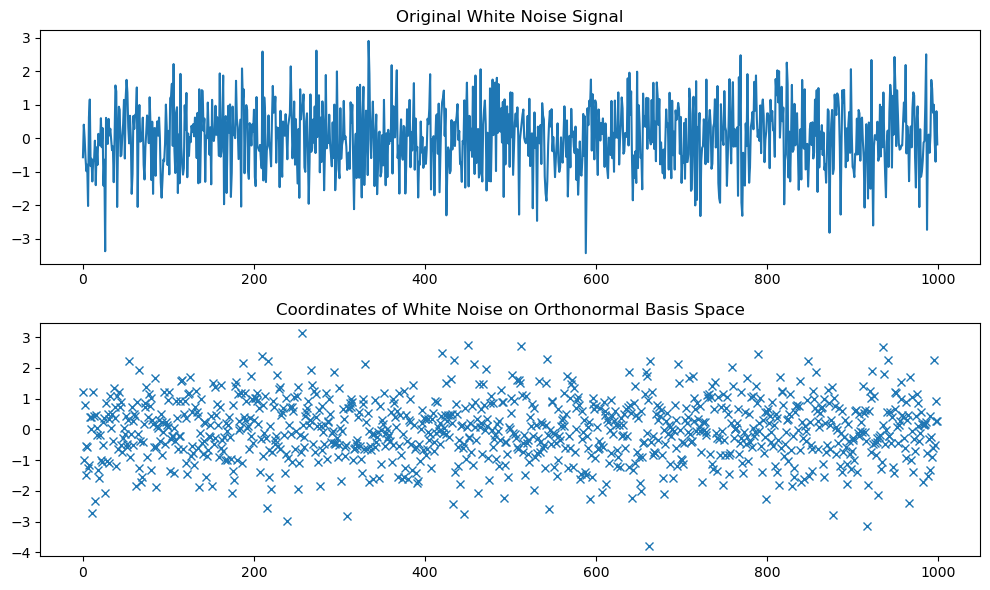

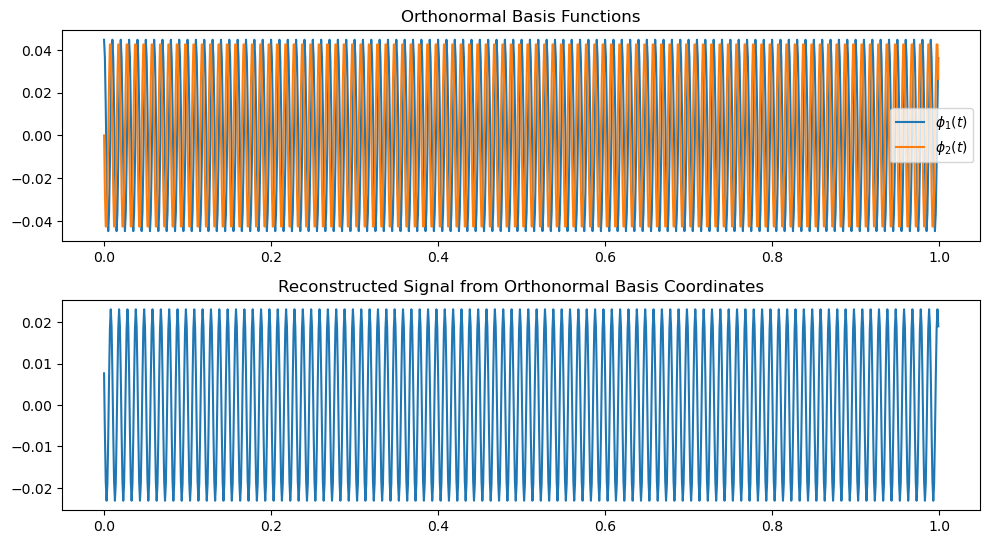

Reconstruction Error: 30.779924647267748


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct

import warnings
warnings.filterwarnings('ignore')

# Step 1: Generate a white noise process
N = 1000  # Number of samples
white_noise = np.random.randn(N)  # Generate white noise with zero mean and unit variance

# Step 2: Construct an orthonormal basis using the Discrete Cosine Transform (DCT)
phi = dct(np.eye(N), norm='ortho')  # Orthonormal DCT matrix

# Step 3: Transform the white noise using the orthonormal basis
transformed_white_noise = np.dot(phi, white_noise)

# Step 4: Compute the coordinates of the white noise signal on the orthonormal basis
coordinates = np.dot(phi.T, white_noise)  # phi.T is the transpose of the orthonormal basis

# Display the result
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(white_noise)
plt.title('Original White Noise Signal')

plt.subplot(2, 1, 2)
plt.plot(coordinates, 'x')
plt.title('Coordinates of White Noise on Orthonormal Basis Space')
plt.tight_layout()
plt.show()

# Step 1: Generate a white noise process
fs = 1000  # Sampling frequency in Hz
fc = 100  # Carrier frequency in Hz
t = np.arange(N) / fs  # Time vector

# Step 2: Define the new orthonormal basis functions
g = np.ones(N)  # Rectangular pulse
epsilon_g = np.sum(g**2)  # Energy of g(t)

# Orthonormal basis functions
phi_1 = np.sqrt(2 / epsilon_g) * g * np.cos(2 * np.pi * fc * t)
phi_2 = -np.sqrt(2 / epsilon_g) * g * np.sin(2 * np.pi * fc * t)

# Step 3: Expand the white noise process onto the new orthonormal basis
a1 = np.dot(phi_1.T, white_noise)  # Coordinate on phi_1
a2 = np.dot(phi_2.T, white_noise)  # Coordinate on phi_2

# Step 4: Reconstruct the white noise signal using the basis functions
reconstructed_signal = a1 * phi_1 + a2 * phi_2

# Display the result
plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(t, phi_1, label='$\phi_1(t)$')
plt.plot(t, phi_2, label='$\phi_2(t)$')
plt.legend()
plt.title('Orthonormal Basis Functions')

plt.subplot(3, 1, 2)
plt.plot(t, reconstructed_signal)
plt.title('Reconstructed Signal from Orthonormal Basis Coordinates')
plt.tight_layout()
plt.show()

# Verify if the original and reconstructed signals match
reconstruction_error = np.linalg.norm(white_noise - reconstructed_signal)
print(f'Reconstruction Error: {reconstruction_error}')


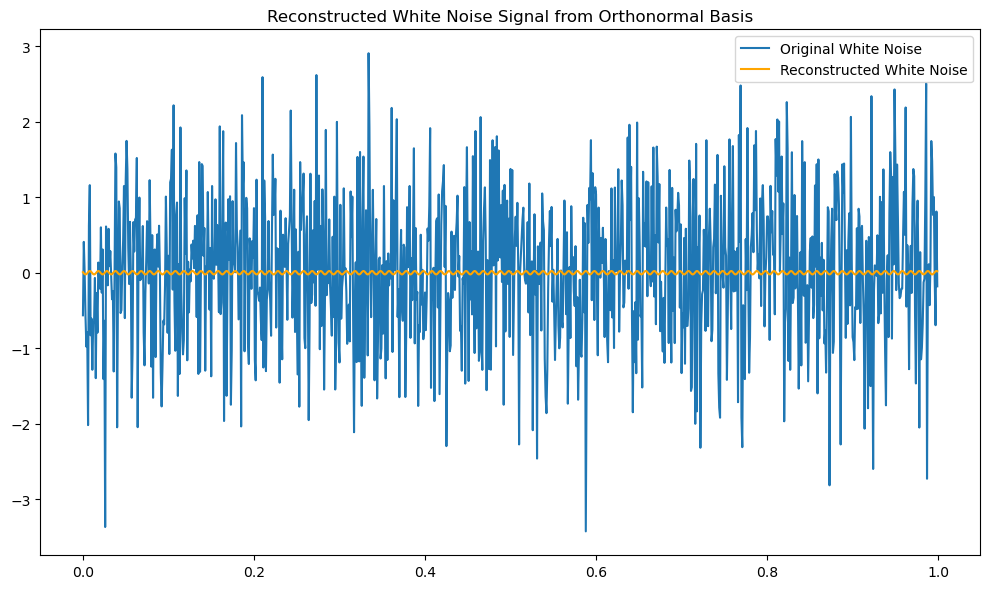

In [4]:
# Comparison between the original noise and reconstructed noise

# Plot comparison
plt.figure(figsize=(10, 6))

plt.plot(t, white_noise, label='Original White Noise')
plt.title('Original White Noise Signal')
plt.legend()

plt.plot(t, reconstructed_signal, label='Reconstructed White Noise', color='orange')
plt.title('Reconstructed White Noise Signal from Orthonormal Basis')
plt.legend()

plt.tight_layout()
plt.show()